In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

Runs: 50


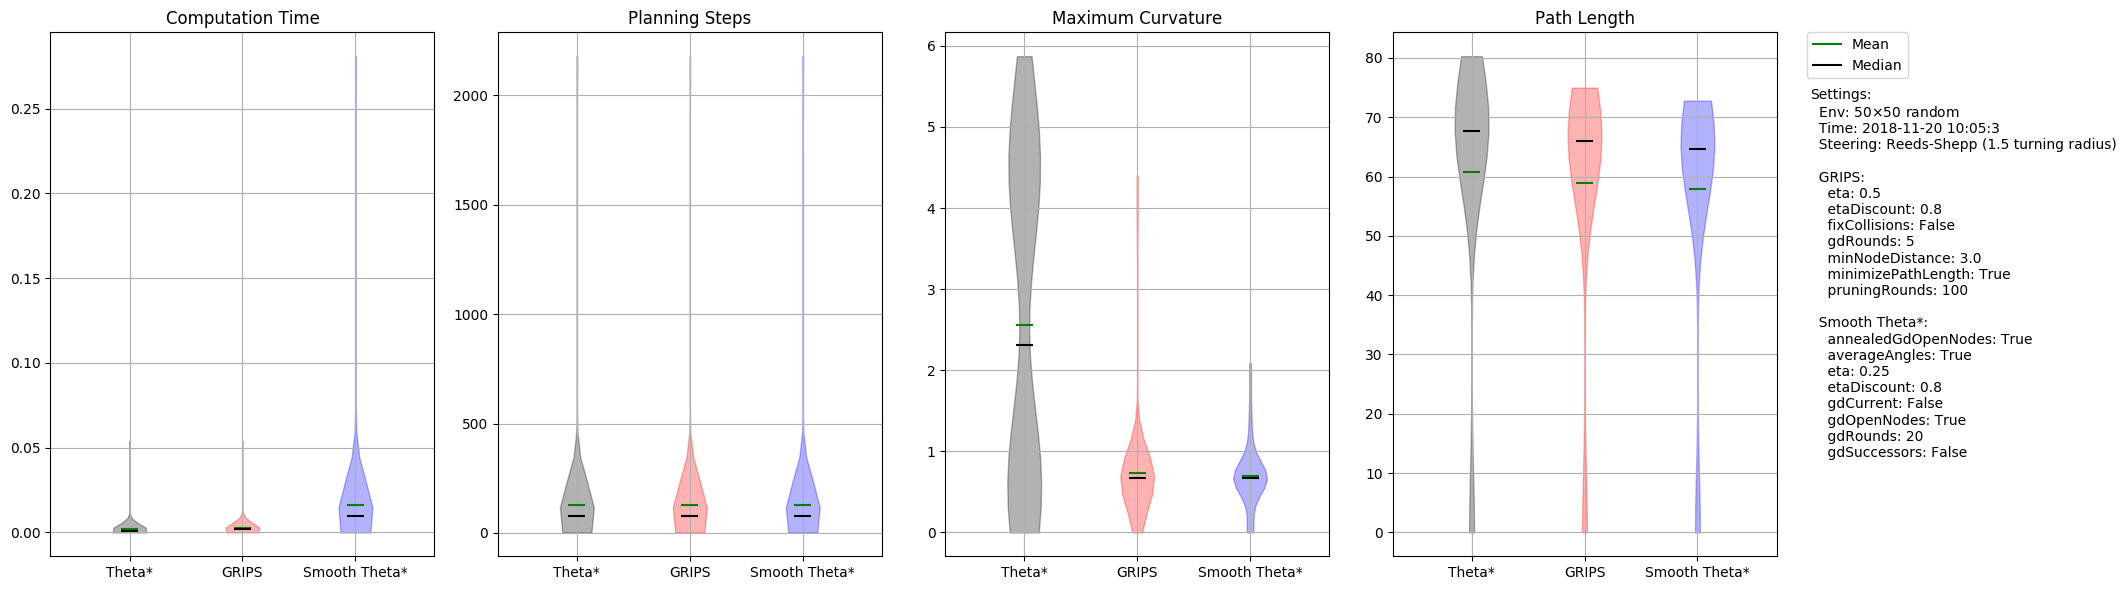

In [6]:
sns.reset_orig()

data = json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-20 10:05:3.json", "r"))

runs = len(data["runs"])
print("Runs:", runs)

def plot_violins(values):
    plt.grid()
    violins = plt.violinplot(values, [0, 1, 2], points=20, widths=0.3,
                          showmeans=True, showextrema=False, showmedians=True)
    violins["bodies"][0].set_facecolor("black")
    violins["bodies"][1].set_facecolor("red")
    violins["bodies"][2].set_facecolor("blue")
    violins["bodies"][0].set_edgecolor("black")
    violins["bodies"][1].set_edgecolor("red")
    violins["bodies"][2].set_edgecolor("blue")
    for partname in ('cmeans','cmedians'):
        violins[partname].set_edgecolor("black")
    violins['cmeans'].set_edgecolor('green')
    plt.gca().set_xlim([-.7, 2.7])
    plt.gca().set_xticks([0, 1, 2])
    plt.gca().set_xticklabels(["Theta*", "GRIPS", "Smooth Theta*"])
    

plt.figure(figsize=(18, 6))
plt.subplot(141)
plt.title("Computation Time")
times = [[e["thetaStar"]["time"] for e in data["runs"]], [e["grips"]["time"] for e in data["runs"]], [e["smoothThetaStar"]["time"] for e in data["runs"]]]
plot_violins(times)

plt.subplot(142)
plt.title("Planning Steps")
steps = [[e["thetaStar"]["steps"] for e in data["runs"]], [e["grips"]["steps"] for e in data["runs"]], [e["smoothThetaStar"]["steps"] for e in data["runs"]]]
plot_violins(steps)

plt.subplot(143)
plt.title("Maximum Curvature")
curvatures = [[e["thetaStar"]["curvature"] for e in data["runs"]], [e["grips"]["curvature"] for e in data["runs"]], [e["smoothThetaStar"]["curvature"] for e in data["runs"]]]
plot_violins(curvatures)

plt.subplot(144)
plt.title("Path Length")
pathLengths = [[e["thetaStar"]["pathLength"] for e in data["runs"]], [e["grips"]["pathLength"] for e in data["runs"]], [e["smoothThetaStar"]["pathLength"] for e in data["runs"]]]
plot_violins(pathLengths)

plt.gca().text(3, 10, "Settings:\n" \
               + ("  Env: %d$\\times$%d %s\n" % (data["environment"]["width"], data["environment"]["height"], data["environment"]["generator"])) \
               + ("  Time: %s\n" % (data["globals"]["time"])) \
               + ("  Steering: %s (%s turning radius)\n\n" % (data["settings"]["steering"], data["settings"]["carTurningRadius"])) \
               + ("  GRIPS:\n%s\n\n" % "\n".join(["    %s: %s" % (key, value) for key, value in data["settings"]["grips"].items()])) \
               + ("  Smooth Theta*:\n%s\n" % "\n".join(["    %s: %s" % (key, value) for key, value in data["settings"]["smoothStar"].items()])) \
)

plt.plot([np.nan], [np.nan], color="green", label="Mean")
plt.plot([np.nan], [np.nan], color="black", label="Median")
plt.legend(bbox_to_anchor=(1.08, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig("gd_only_gd_annealed_average_angles.png", dpi=300)

In [32]:
from bitarray import bitarray
from IPython.core.display import display, HTML
import math
import matplotlib
import matplotlib.cm as cmx
import ipywidgets as widgets

# data = [
#     #json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 11:30:3.json", "r")),
#     #json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 11:34:0.json", "r")),
#     #json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 11:37:0.json", "r")),
#     #json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 11:38:5.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 18:52:5.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 19:03:4.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 19:07:3.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 19:19:0.json", "r")),
#     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486486 2018-12-12 23:19:3.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486486 2018-12-12 23:27:2.json", "r")),
#     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486486 2018-12-12 23:31:2.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 19:46:1.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 19:48:4.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 19:52:2.json", "r")),
# #     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486477 2018-12-12 19:54:0.json", "r")),
# ]


MAX_PLOTS_PER_LINE = 5
SHOW_NODES = False
NODE_ALPHA = 0.5
NUM_COLORS = 7
COLOR_MAP = 'Set1'  # 'Set1'


# do not plot these planners in succeeding benchmarks
Skipped_duplicate_planners = ["rrtStar", "thetaStar"]

# definetly show these planners repeatedly for every benchmark
Force_duplicate_planners = ["grips"]

# do not plot these planners at all
Ignore_planners = ["thetaStar", "rrtStar", "smoothThetaStar"]

axes = [
    ["time", "steps", "curvature", "pathLength"],
    ["meanClearingDistance", "medianClearingDistance", "minClearingDistance", "maxClearingDistance"]
]

axis_labels = [
    ["Computing Time", "Planning Steps", "Maximum Curvature", "Path Length"],
    ["Mean Clearing Distance", "Median Clearing Distance", "Min Clearing Distance", "Max Clearing Distance"]
]

def make_dashboard(data, skipped_duplicate_planners, force_duplicate_planners, ignore_planners):
    axes_h = MAX_PLOTS_PER_LINE
    axes_v = len(data[0]["runs"]) // MAX_PLOTS_PER_LINE + 1

    if len(data) > 1:
        # check if environment seeds match between runs
        seeds_0 = tuple([run["environment"]["seed"] for run in data[0]["runs"]])
        for i in range(1, len(data)):
            seeds_i = tuple([run["environment"]["seed"] for run in data[i]["runs"]])
            if seeds_0 != seeds_i:
                display(HTML('<b style="color: #f00">ERROR: Environment seeds between benchmarks 0 and %i do not match!</b>' % i))

    def dir2table(d):
        table = "<table>"
        for k, v in d.items():
            table += '<tr><td style="text-align:right !important"><b>%s</b></td>' % k
            if isinstance(v, dict):
                table += '<td>' + dir2table(v) + '</td>'
            else:
                table += '<td style="color:#030;text-align:left !important;font-family:monospace !important" align="left">%s</td>' % v
            table += '</tr>'
        table += "</table>"
        return table

    def comparison_table(address):
        nonlocal skipped_duplicate_planners

        def retrieve(benchmark_id, ad):
            d = data[benchmark_id]
            ad = ad.split('/')
            v = d[ad[0]]
            for a in ad[1:]:
                v = v[a]
            return v

        table = "<table>"
        d = retrieve(0, address)
        dicts = []
        table += '<tr style="background-color:#003 !important; color:#fff !important"><th style="text-align:left !important">%s</th>' % address + "".join('<th style="text-align:left !important">BM %i</th>' % i for i in range(len(data))) + '</tr>'

        for k, v in d.items():
            curr_address = address + '/' + k
            if isinstance(v, dict):
                dicts.append((k, curr_address, v))
            else:
                table += '<tr><td style="text-align:right !important"><b>%s</b></td>' % k
                for bm in range(len(data)):
                    bv = retrieve(bm, curr_address)
                    table += '<td style="'
                    if v != bv:
                        table += 'color:#069 !important;background-color:#ff4 !important;'
                    table += 'text-align:left !important;font-family:monospace !important" align="left">%s</td>' % bv

            table += '</tr>'
        for k, a, v in dicts:
            table += '<tr><td style="text-align:right !important"><b>%s</b></td>' % k
            table += '<td colspan="%i">' % (len(data)) + comparison_table(a) + '</td></tr>'
            is_duplicate = True
            for bm in range(1, len(data)):
                bv = retrieve(bm, a)
                if str(v) != str(bv):
                    is_duplicate = False
            if is_duplicate and k not in force_duplicate_planners:
                skipped_duplicate_planners.append(k)

        table += "</table>"
        return table

    # print smooth star settings
    # table = "<tr><th style='text-align:left !important'>SBPL</th>" + "".join(["<th style='text-align:left !important'>ST %i</th>" % (i+1) for i in range(len(data))]) + "</tr>"
    # table += "<tr><td style='vertical-align:top !important'>%s</td>" % dir2table(data[0]["settings"]["sbpl"]) + "".join(["<td style='vertical-align:top !important'>%s</td>" % dir2table(d["settings"]["smoothThetaStar"]) for d in data]) + "</tr>"

    if len(data) == 0:
        display(HTML('<table>%s</table>' % dir2table(data[0]["settings"])))
    else:
        display(HTML(comparison_table("settings")))

    print("Skipping the following planners:", ", ".join(skipped_duplicate_planners))


    cm = plt.get_cmap(COLOR_MAP) 
    cNorm  = matplotlib.colors.Normalize(vmin=0, vmax=NUM_COLORS)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    colors = [scalarMap.to_rgba(v) for v in range(NUM_COLORS)]
    # colors = ["black", "red", "green", "blue", "lightblue", "cyan", "turquoise", "teal"]

    assigned_colors = {}

    def plot_run(j, i, run, plot_only_trajectories=True):    
        w = run["environment"]["width"] + 1
        h = run["environment"]["height"] + 1
        ax = plt.gca()
        if not plot_only_trajectories:
            major_ticks = np.arange(0, max(w, h), 10)
            minor_ticks = np.arange(0, max(w, h), 1)

            ax.set_xticks(major_ticks)
            ax.set_xticks(minor_ticks, minor=True)
            ax.set_yticks(major_ticks)
            ax.set_yticks(minor_ticks, minor=True)

            # And a corresponding grid
            ax.grid(which='both')

            # Or if you want different settings for the grids:
            ax.grid(which='minor', alpha=0.2)
            ax.grid(which='major', alpha=0.5)

            plt.title("Run %i/%i (%i$\\times$%i %s %i)" % (i+1, len(data[0]["runs"]), w-1, h-1, run["environment"]["generator"], run["environment"]["seed"]))
            map_data = np.array(list(bitarray(run["environment"]["map"]))).reshape((w, h))
            map_data = 1. - np.flip(map_data, axis=0)
            plt.imshow(map_data, cmap='gray', vmin=-1, vmax=1, extent=[0, w, 0, h], alpha=0.5)

            start = run["environment"]["start"]
            goal = run["environment"]["goal"]
            plt.scatter([start[0]], [start[1]], label="Start")
            plt.scatter([goal[0]], [goal[1]], label="Goal")

        for ip, (planner, plan) in enumerate(run["plans"].items()):
            if planner in ignore_planners:
                continue
            path = np.array(plan["path"])
            if path.size == 0:
                display(HTML('<b style="color: #f60">Warning: %s did not find a path in run #%i from benchmark %i.</b>' % (planner, i+1, j)))
                continue
            if j > 0:
                if planner in skipped_duplicate_planners:
                    continue
                else:
                    planner += " %i" % j
            elif len(data) > 1 and planner not in skipped_duplicate_planners:
                planner += " 0"
            if planner not in assigned_colors:
                assigned_colors[planner] = len(assigned_colors)
            color = colors[assigned_colors[planner] % len(colors)]
            plt.plot(path[:, 0], path[:, 1], label=planner, color=color)
            if SHOW_NODES:
                traj = np.array(plan["trajectory"])
                plt.scatter(traj[:, 0], traj[:, 1], color=color, s=10, alpha=NODE_ALPHA)
                for node in plan["trajectory"]:
                    dx, dy = math.cos(node[2]), math.sin(node[2])
                    plt.arrow(node[0], node[1], dx * 2., dy * 2., color=color, width=0.01, head_width=0.2, alpha=NODE_ALPHA)

        if not plot_only_trajectories:
            ax.set_xlim([0, w])
            ax.set_ylim([0, h])

        if i % MAX_PLOTS_PER_LINE == 0:
            plt.legend()


    plt.figure(figsize=(axes_h * 6, axes_v * 6))
    for j, d in enumerate(data):
        for i, run in enumerate(d["runs"]):
            plt.subplot(axes_v, axes_h, i+1)
            plot_run(j, i, run, plot_only_trajectories=(j>0))

    plt.tight_layout()
    plt.show()
    # plt.savefig("trajectories.png", dpi=300, bbox_inches='tight')
    
    
    
    # Violin plots
    axes_h = len(axes[0])
    axes_v = len(axes)
    def plot_violin(x, y, metric):
        if x == axes_h-1:
            plt.plot([np.nan], [np.nan], color="green", label="Mean")
            plt.plot([np.nan], [np.nan], color="black", label="Median")
            plt.legend(bbox_to_anchor=(1.08, 1), loc=2, borderaxespad=0.)
        violins = {}
        violin_colors = []
        violin_labels = []
        for j, d in enumerate(data):
            for i, run in enumerate(d["runs"]):
                column = []
                for ip, (planner, plan) in enumerate(run["plans"].items()):
                    if planner in ignore_planners:
                        continue
                    if j > 0:
                        if planner in skipped_duplicate_planners:
                            continue
                        else:
                            planner += " %i" % j
                    elif len(data) > 1 and planner not in skipped_duplicate_planners:
                        planner += " 0"
                    
                    if planner not in violins:
                        violins[planner] = []
                        violin_colors.append(colors[assigned_colors[planner] % len(colors)])
                        violin_labels.append(planner)
                    if metric not in plan or plan[metric] is None or np.isnan(plan[metric]):
                        violins[planner].append(float('nan'))
                    else:
                        violins[planner].append(plan[metric])
            
        plt.grid()
#         print(metric, violins)
        violins = [violins[k] for k in violin_labels]
        ticks = list(range(len(violins)))
        vs = plt.violinplot(violins, ticks, points=20, widths=0.3,
                              showmeans=True, showextrema=False, showmedians=True)
        for i, body in enumerate(vs["bodies"]):
            body.set_facecolor(violin_colors[i])
            body.set_edgecolor(violin_colors[i])
        for partname in ('cmeans','cmedians'):
            vs[partname].set_edgecolor("black")
        vs['cmeans'].set_edgecolor('green')
        plt.gca().set_xlim([-.7, len(ticks) - 1 + .7])
        plt.gca().set_xticks(ticks)
        plt.gca().set_xticklabels(violin_labels)
            
                    
    plt.figure(figsize=(axes_h * 6, axes_v * 6))
    for y in range(axes_v):
        for x in range(axes_h):
            plt.subplot(axes_v, axes_h, x + y*axes_h + 1)
            plt.title(axis_labels[y][x])
            plot_violin(x, y, axes[y][x])

    plt.tight_layout()
    plt.show()
    
l = widgets.Layout(flex='0 1 auto', height='200px', min_height='200px', width='auto')
log_input = widgets.Textarea(
    value='/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486486 2018-12-12 23:31:2.json',
    placeholder='Type something',
    description='Logs:',
    disabled=False,
    layout=l
)
display(log_input)


num_colors = widgets.IntSlider(
    value=7,
    min=1,
    max=25,
    step=1,
    description='Num colors:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(num_colors)

color_map = widgets.Dropdown(
    options=[
             'viridis', 'plasma', 'inferno', 'magma',
             'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
             'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
             'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
             'hot', 'afmhot', 'gist_heat', 'copper',
             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
             'Pastel1', 'Pastel2', 'Paired', 'Accent',
             'Dark2', 'Set1', 'Set2', 'Set3',
             'tab10', 'tab20', 'tab20b', 'tab20c',
             'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
             'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
             'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
            ],
    value='Set2',
    description='Colormap:',
    disabled=False,
)
display(color_map)

l = widgets.Layout(flex='0 1 auto', width='auto')
skipped = widgets.Text(
    value='rrtStar, thetaStar',
    description='Skip:',
    disabled=False,
    layout=l
)
display(skipped)

force = widgets.Text(
    value='grips',
    description='Force:',
    disabled=False,
    layout=l
)
display(force)

ignore = widgets.Text(
    value='thetaStar, rrtStar, smoothThetaStar',
    description='Ignore:',
    disabled=False,
    layout=l
)
display(ignore)

show_nodes = widgets.Checkbox(
    value=False,
    description='Show nodes',
    disabled=False
)
display(show_nodes)

out = widgets.Output()

button = widgets.Button(description='Plot')
out = widgets.Output()
def on_button_clicked(b):
    global MAX_PLOTS_PER_LINE
    global SHOW_NODES
    global NODE_ALPHA
    global NUM_COLORS
    global COLOR_MAP
    
    out.clear_output()
    with out:
#         print([filename for filename in log_input.value.split('\n')])
        data = [json.load(open(filename, "r")) for filename in log_input.value.split('\n')]
        NUM_COLORS = num_colors.value
        COLOR_MAP = color_map.value
        SHOW_NODES = show_nodes.value
        make_dashboard(data,
                       list(map(lambda s: s.strip(), skipped.value.split(','))),
                       list(map(lambda s: s.strip(), force.value.split(','))),
                       list(map(lambda s: s.strip(), ignore.value.split(','))))
        


button.on_click(on_button_clicked)
widgets.VBox([button, out])

Textarea(value='/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1540486486 2018-12-1…

IntSlider(value=7, continuous_update=False, description='Num colors:', max=25, min=1)

Dropdown(description='Colormap:', index=56, options=('viridis', 'plasma', 'inferno', 'magma', 'Greys', 'Purple…

Text(value='rrtStar, thetaStar', description='Skip:', layout=Layout(flex='0 1 auto', width='auto'))

Text(value='grips', description='Force:', layout=Layout(flex='0 1 auto', width='auto'))

Text(value='thetaStar, rrtStar, smoothThetaStar', description='Ignore:', layout=Layout(flex='0 1 auto', width=…

Checkbox(value=False, description='Show nodes')